In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.model.data import __version__

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from src.base import logger
from src.config import get_config, init_config_file
from src.model.data import make_dataset
from src.model.preprocessing import PreProcessor

In [2]:
data_config = get_config(filename="config/model.yaml")

features_config = get_config(filename="config/features.yaml")

X,y  = make_dataset(data_config, download_bases=False)

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

preprocessor = PreProcessor(features_config).fit(X_train)

X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)

classifier = LogisticRegression(solver="liblinear")

classifier.fit(X_train, y_train)

f1_score(y_test,classifier.predict(X_test), average = 'weighted')

0.6532775795519787

In [54]:
%run src/model/preprocessing.py

heart = pd.read_csv("/home/risknow/Datasets/heart.csv")

#init_config_file(heart.drop(columns='output'), filename='config/output_file.yaml')

features_config = get_config(filename='config/output_file.yaml')

X = heart.drop(columns='output')
y = heart['output']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

preprocessor = PreProcessor(features_config)

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)

classifier = LogisticRegression(solver="liblinear")

classifier.fit(X_train, y_train)

f1_score(y_test,classifier.predict(X_test), average = 'weighted')

0.7726854589657665

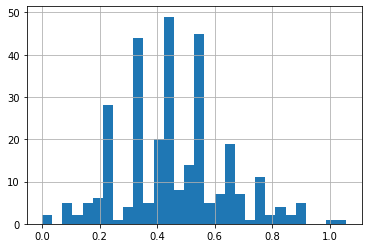

In [53]:
teste = preprocessor.transform(X)
teste['trtbps'].hist(bins=30)
plt.show()

In [37]:
import yaml
from io import StringIO

def init_config_file(dataframe, filename):
    
    data = [column_properties(dataframe[col]) for col in dataframe.columns]

    string_stream = StringIO()

    yaml.dump(data, string_stream, default_flow_style=False, sort_keys=False)

    main_string = string_stream.getvalue()

    string_stream.close()

    main_string = (
        main_string
        .replace("\n- name:","\n\n- name:")
        .replace("'[left(]","")
        .replace("[right]'","")
    )


    with open(filename, 'w') as outfile:
        outfile.write(main_string)


In [29]:
from src.base.file import read_file_string
main_string = read_file_string('config/output_file.yaml', splitlines=False)

main_string = (
    main_string
    .replace("\n- name:","\n\n- name:")
    .replace("'[left(]","")
    .replace("[right]'","")
)

main_string

'- name: age\n  dtype: int\n  limits: [29, 77]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: sex\n  dtype: int\n  limits: [0, 1]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: cp\n  dtype: int\n  limits: [0, 3]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: trtbps\n  dtype: int\n  limits: [94, 200]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: chol\n  dtype: int\n  limits: [126, 564]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: fbs\n  dtype: int\n  limits: [0, 1]\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n\n- name: restecg

"- name: age\n  dtype: int\n  limits: '[left(][29, 77][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: sex\n  dtype: int\n  limits: '[left(][0, 1][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: cp\n  dtype: int\n  limits: '[left(][0, 3][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: trtbps\n  dtype: int\n  limits: '[left(][94, 200][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: chol\n  dtype: int\n  limits: '[left(][126, 564][right]'\n  transformation: identity\n  imputation_strategy: mean\n  imputation_param: null\n  scaler: min_max\n  weight: 1\n- name: fbs\n  dtype: int\n  limits: '[left(][0, 1][right]'\n  transformation: identity\n  imputation_strat